# Tensorflow  Fashion MNIST classification

Dataset - https://www.tensorflow.org/datasets/catalog/fashion_mnist

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [9]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [10]:
print(train_labels[0])

9


In [12]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

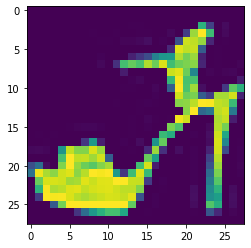

In [13]:
plt.imshow(train_data[9])

In [14]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

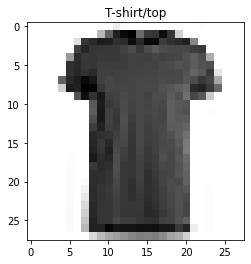

In [15]:
plt.imshow(train_data[17], cmap=plt.cm.binary)
plt.title(class_names[train_labels[17]]);

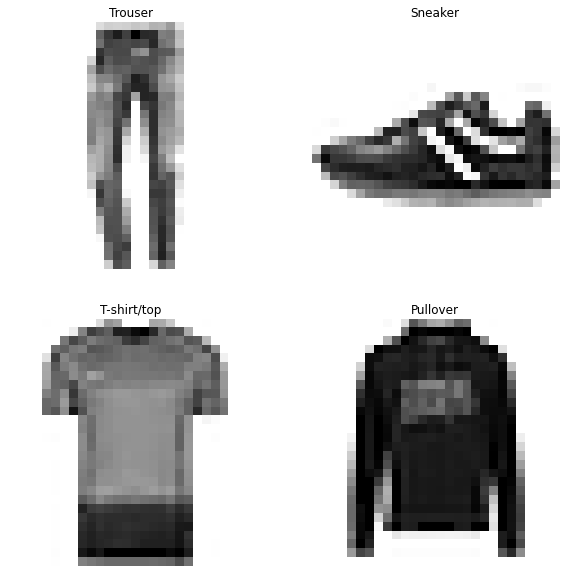

In [17]:
import random

plt.figure(figsize=(10,10))

for i in range(4):
  ax= plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Building a  Multiclass Model

In [18]:
tf.random.set_seed(123)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

history_1 = model_1.fit(train_data,
                        train_labels,
                        epochs = 50,
                        validation_data = (test_data, test_labels))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3030 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3028 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
1875/1875 [==============================] - 12s 6ms/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 20)                15700     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 4)                 44        
                                                                 
 dense_3 (Dense)             (None, 10)                50        
                                                                 
Total params: 16,004
Trainable params: 16,004
Non-trainable params: 0
_________________________________________________________________


In [22]:
tf.random.set_seed(123)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    #tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

history_2 = model_2.fit(train_data,
                        train_labels,
                        epochs = 15,
                        validation_data = (test_data, test_labels))

Epoch 1/15
1875/1875 [==============================] - 7s 3ms/step - loss: 2.5396 - accuracy: 0.1001 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3034 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3029 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1002
Epoch 4/15
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3036 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/15
1875/1875 [==============================] - 9s 5ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy:

In [23]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 4)                 44        
                                                                 
 dense_6 (Dense)             (None, 10)                50        
                                                                 
Total params: 7,944
Trainable params: 7,944
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_1.evaluate(test_data,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302621603012085, 0.10000000149011612]

In [24]:
model_2.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026235103607178, 0.10000000149011612]

In [25]:
train_data.min(), train_data.max()

(0, 255)

In [28]:
norm_train_data = train_data/train_data.max()
norm_test_data = test_data/test_data.max()

norm_train_data.max(), norm_train_data.min()

(1.0, 0.0)

In [35]:
tf.random.set_seed(123)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

history_3 = model_3.fit(norm_train_data,
                        train_labels,
                        epochs=15,
                        validation_data=(norm_test_data, test_labels))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9500 - accuracy: 0.7052 - val_loss: 0.6801 - val_accuracy: 0.7780
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5698 - accuracy: 0.8147 - val_loss: 0.5748 - val_accuracy: 0.8064
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5033 - accuracy: 0.8309 - val_loss: 0.5431 - val_accuracy: 0.8118
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4786 - accuracy: 0.8383 - val_loss: 0.5122 - val_accuracy: 0.8277
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4636 - accuracy: 0.8426 - val_loss: 0.4984 - val_accuracy: 0.8290
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4518 - accuracy: 0.8460 - val_loss: 0.4874 - val_accuracy: 0.8333
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4438 - accuracy: 0.8476 - val_loss: 0.4844 - val_accuracy:

In [36]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
 dense_14 (Dense)            (None, 4)                 44        
                                                                 
 dense_15 (Dense)            (None, 10)                50        
                                                                 
Total params: 7,944
Trainable params: 7,944
Non-trainable params: 0
_________________________________________________________________


In [38]:
model_3.evaluate(norm_test_data, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.4493 - accuracy: 0.8482


[0.44925254583358765, 0.8482000231742859]

<AxesSubplot:title={'center':'Normalized data'}>

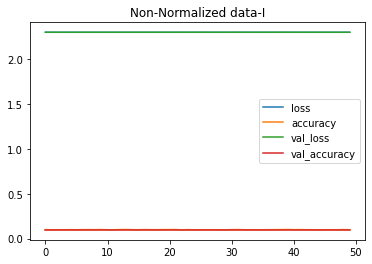

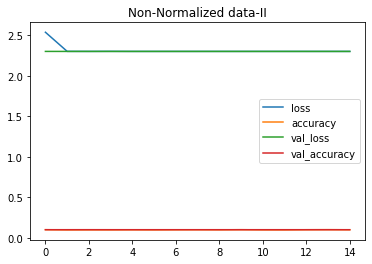

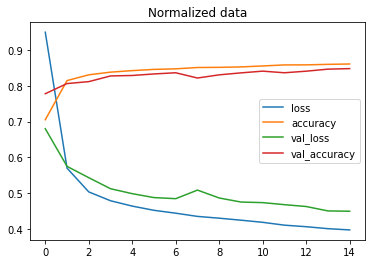

In [40]:
pd.DataFrame(history_1.history).plot(title='Non-Normalized data-I')
pd.DataFrame(history_2.history).plot(title='Non-Normalized data-II')
pd.DataFrame(history_3.history).plot(title='Normalized data')

In [46]:
tf.random.set_seed(123)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_4 = model_4.fit(norm_test_data,
                        test_labels,
                        epochs=40,
                        validation_data =(norm_test_data, test_labels),
                        callbacks = lr_scheduler,
                        verbose=0)

Text(0.5, 1.0, 'Learning Rate vs Loss')

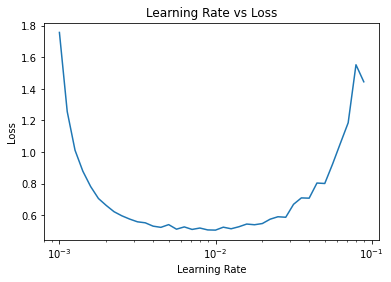

In [47]:
lrs = 1e-3 * (10**(np.arange(40)/20))

plt.semilogx(lrs,history_4.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel('Loss')
plt.title('Learning Rate vs Loss')

In [48]:
tf.random.set_seed(123)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])

history_5 = model_5.fit(norm_train_data,
                        train_labels,
                        epochs=40,
                        validation_data=(norm_test_data, test_labels),
                        verbose=0)

In [51]:
model_5.evaluate(norm_test_data, test_labels)
model_4.evaluate(norm_test_data, test_labels)
model_3.evaluate(norm_test_data, test_labels)
model_2.evaluate(norm_test_data, test_labels)
model_1.evaluate(norm_test_data, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302621603012085, 0.10000000149011612]

### Confusion Mtrix

In [54]:
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes = None, figsize=(16,16), text_size=15):
  """
  Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [56]:
y_probs = model_3.predict(norm_test_data)
y_probs[:5]

313/313 [==============================] - 2s 5ms/step


array([[3.7537959e-06, 2.3560362e-10, 2.7980074e-09, 2.0168499e-11,
        1.3001332e-08, 2.5307262e-02, 8.3266277e-06, 6.2183857e-02,
        1.6406301e-04, 9.1233265e-01],
       [1.3784050e-06, 9.5308180e-13, 9.9295402e-01, 7.7314107e-06,
        3.4551597e-03, 2.2359196e-19, 3.5818620e-03, 3.0617495e-36,
        6.2962315e-09, 1.2712700e-19],
       [2.7474907e-04, 9.9962181e-01, 2.3751742e-13, 5.2731149e-05,
        5.7682129e-08, 2.3018876e-35, 1.4401945e-07, 2.1430980e-22,
        5.0484741e-05, 2.3270523e-33],
       [2.8492641e-05, 9.9621475e-01, 4.7251641e-10, 3.7519292e-03,
        1.7596738e-06, 6.0615881e-28, 1.7181449e-07, 7.1474730e-21,
        2.9164996e-06, 2.5443506e-30],
       [2.4391469e-01, 4.1463307e-05, 1.0610259e-02, 2.4594257e-03,
        1.3209171e-02, 5.2837048e-13, 7.1477365e-01, 8.1437847e-15,
        1.4991474e-02, 3.9894740e-10]], dtype=float32)

In [57]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [59]:
y_preds = y_probs.argmax(axis=1)

In [60]:
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [61]:
confusion_matrix(y_true= test_labels,
                 y_pred = y_preds)

array([[794,   2,   9,  52,  10,   0, 124,   1,   8,   0],
       [  4, 948,   1,  33,   9,   0,   3,   0,   2,   0],
       [ 15,   0, 746,  16, 163,   0,  59,   0,   1,   0],
       [ 26,   6,  16, 864,  44,   0,  40,   0,   4,   0],
       [  0,   0,  97,  30, 825,   0,  46,   0,   2,   0],
       [  0,   0,   0,   0,   0, 951,   1,  31,   3,  14],
       [132,   1, 127,  41, 127,   0, 563,   0,   9,   0],
       [  0,   0,   0,   0,   0,  42,   0, 931,   0,  27],
       [  2,   3,   4,   4,  17,   6,  32,   6, 926,   0],
       [  0,   0,   0,   0,   0,  19,   2,  45,   0, 934]])

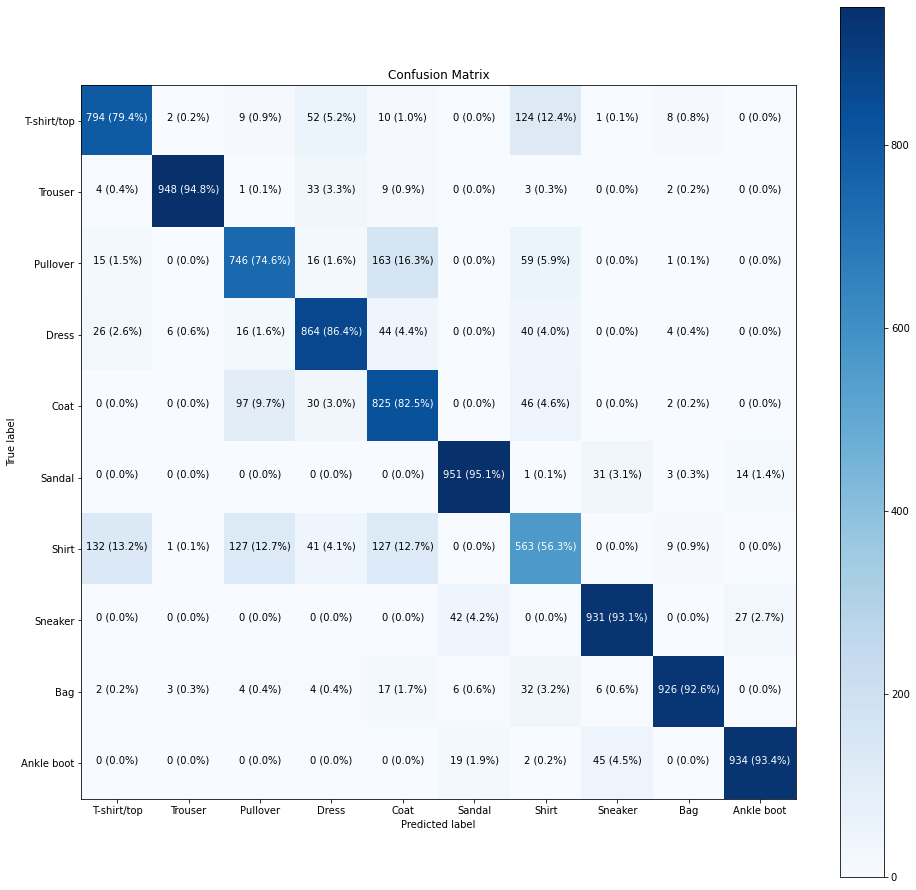

In [63]:
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(16, 16),
                      text_size=10)
     

In [64]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 31ms/step


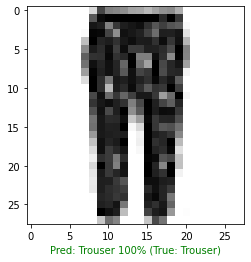

In [68]:
plot_random_image(model=model_3, 
                  images=test_data, 
                  true_labels=test_labels, 
                  classes=class_names)

In [70]:
weights, biases = model_3.layers[1].get_weights()
weights, weights.shape

(array([[-0.09576738,  0.36946702, -0.05786439, ...,  0.20643508,
          0.5658482 ,  0.04315234],
        [-0.31566563, -0.08461078,  0.00589766, ...,  0.30150238,
          0.0849715 , -0.00727878],
        [-0.5453669 , -0.5663703 , -0.02688925, ..., -0.79643327,
          0.54012096, -0.20809077],
        ...,
        [-0.17030568,  0.7246046 ,  0.04590335, ..., -0.01735095,
          0.25735503,  0.09182593],
        [ 0.14650673,  0.44166774, -0.04465036, ..., -0.06797204,
         -0.1261242 ,  0.25320908],
        [-0.3271621 ,  0.2744147 , -0.06209639, ..., -0.14682691,
          0.26862347,  0.112528  ]], dtype=float32), (784, 10))

In [71]:
biases, biases.shape

(array([ 0.8096948 , -0.27876765, -0.01968487, -0.5277104 ,  0.10726479,
         0.32124853, -0.27275944,  0.26055655,  0.07100351,  0.15404816],
       dtype=float32), (10,))

In [72]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 10)                7850      
                                                                 
 dense_14 (Dense)            (None, 4)                 44        
                                                                 
 dense_15 (Dense)            (None, 10)                50        
                                                                 
Total params: 7,944
Trainable params: 7,944
Non-trainable params: 0
_________________________________________________________________


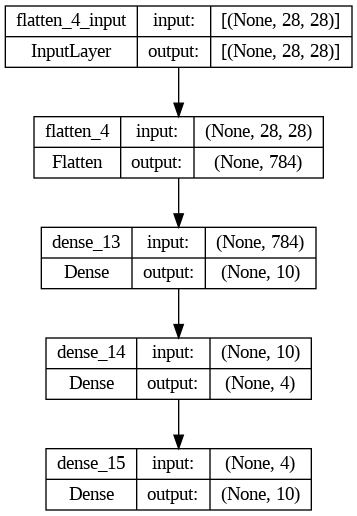

In [74]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)